## Defining the bussiness problem
The company wants expand and are intrested in purchasing airplanes for commercial and private enterprices. The aviation data set will aid in determining which aircrafts are low risk for the company start the new bussiness endeavour.


## Understanding the context
Understanding the factors leading to aviation accidents will aid in determining the most suitable aircraft to be used by the company.


## Recording the Experimental Design
Data Collection: Obtained historica aviation accidents from 1948 to 2022.
Data Cleaning: Handle missing values, Handle null values and Remove duplicated 


In [103]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [104]:
# using pandas to load csv file
df = pd.read_csv("AviationData.csv",low_memory = False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [105]:
# Shape of the dataset
df.shape

(88889, 31)

In [106]:
# Description of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [107]:
# lidt of columns in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [108]:
# Checking for duplicated rows
df.duplicated().sum()

0

In [109]:
# Checking for missing values in each column
missing_values = df.isnull().any()
missing_values

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [110]:
#Checking for the total number of missing per each column
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1317
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7077
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6381
Publication.Date          13771
dtype: i

In [111]:
#dropping the columns that have more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1, inplace=False)

In [112]:
df.shape

(88889, 25)

In [113]:
#filling the missing values with "Unknown" for categorical columns
for col in ['Location','Airport.Code', 'Country','Registration.Number', 'Amateur.Built','Weather.Condition','Report.Status','Publication.Date','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Aircraft.damage','Purpose.of.flight','Broad.phase.of.flight','Report.Status','Airport.Name','Injury.Severity']:
    df[col] = df[col].fillna("Unknown")
df.isnull().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Registration.Number          0
Make                        63
Model                       92
Amateur.Built                0
Number.of.Engines         6084
Engine.Type               7077
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64

In [114]:
# Dropping rows with missing values in critical columns
df = df.dropna(subset=['Make', 'Model', 'Engine.Type', 'Number.of.Engines',])
df.isnull().sum()



Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
Purpose.of.flight         0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

## Exploratory Analysis (EDA)

In [115]:
#displaying the unique make
unique_make = df["Make"].unique()
unique_make
                  

array(['Stinson', 'Piper', 'Cessna', ..., 'HIBBARD NORMAN E',
       'WASZAK ARTHUR B', 'STEPHEN J HOFFMAN'], dtype=object)

In [116]:
#displaying the unique Models
unique_model = df["Model"].unique()
unique_model

array(['108-3', 'PA24-180', '172M', ..., '305C (0-1E)',
       'ZENAIR CH 601 HD', 'MS-500'], dtype=object)

In [117]:
#count the unique values in the 'Make' column to find the number of accidents per manufacturer
make_count = df['Make'].value_counts().head(10)
print(make_count)


Cessna      21730
Piper       11773
Beech        4189
CESSNA       3929
PIPER        2303
Bell         1982
Boeing       1222
Grumman      1086
Mooney       1078
Bellanca      878
Name: Make, dtype: int64


In [118]:
#count the unique values in the 'model' to find the number of accidents per model
model_count = df['Model'].value_counts().head(10)
print(model_count)

152          2322
172          1608
172N         1136
PA-28-140     893
150           785
172M          774
172P          672
180           607
182           589
150M          580
Name: Model, dtype: int64


In [119]:
# finding the model and its make with the highest number of accidents
accident_counts = df.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')
most_accidents = accident_counts.loc[accident_counts['Accident Count'].idxmax()]
print(most_accidents)

Make              Cessna
Model                152
Accident Count      2160
Name: 4836, dtype: object


In [120]:
# finding the model and its make with th lowest number of accidents
least_accidents = df.groupby(['Make', 'Model']).size().reset_index(name='Accident Count')
least_accidents = least_accidents.loc[least_accidents['Accident Count'].idxmin()]
print(least_accidents)

Make              107.5 Flying Corporation
Model                    One Design DR 107
Accident Count                           1
Name: 0, dtype: object


In [121]:
# Number of accidents based on engine type
engine_type_counts = df['Engine.Type'].value_counts()
print(engine_type_counts)

Reciprocating      68991
Turbo Shaft         3531
Turbo Prop          3325
Turbo Fan           2377
Unknown              772
Turbo Jet            695
None                  15
Geared Turbofan       11
Electric               8
LR                     2
NONE                   2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64


In [122]:
# Number of accidentsbased on number of engines
engine_number_counts = df['Number.of.Engines'].value_counts()
print(engine_number_counts)

1.0    67673
2.0    10496
0.0      692
3.0      469
4.0      398
8.0        3
Name: Number.of.Engines, dtype: int64


In [123]:
# least number of accidents based on engine type
least_engine_type_counts = df['Engine.Type'].value_counts().tail(1)
print(least_engine_type_counts)

UNK    1
Name: Engine.Type, dtype: int64


In [124]:
# most number of accidents based on engine type
most_engine_type_counts = df['Engine.Type'].value_counts().head(1)
print(most_engine_type_counts)

Reciprocating    68991
Name: Engine.Type, dtype: int64


In [125]:
#grouping each plane make with its repectful type
Plane_type = df.groupby(["Make","Model"])
# getting the number of accident per plane type
Planes_list = Plane_type.size().reset_index(name="Number_of_Accidents").sort_values("Number_of_Accidents", ascending=False).head(20)



In [126]:
# getting the planes with the most number of accidents
Planes_with_most_accident = Plane_type.size().reset_index(name="Number_of_Accidents").sort_values("Number_of_Accidents", ascending=False).head(20)
print(Planes_with_most_accident)


          Make      Model  Number_of_Accidents
4836    Cessna        152                 2160
4858    Cessna        172                 1236
4901    Cessna       172N                  986
13280    Piper  PA-28-140                  802
4811    Cessna        150                  711
4899    Cessna       172M                  657
4904    Cessna       172P                  590
4835    Cessna       150M                  537
13177    Piper      PA-18                  534
13290    Piper  PA-28-180                  498
13289    Piper  PA-28-161                  495
4933    Cessna        180                  488
13297    Piper  PA-28-181                  462
4955    Cessna        182                  449
13429    Piper  PA-38-112                  438
13185    Piper  PA-18-150                  437
4834    Cessna       150L                  407
2906      Bell       206B                  404
4146    CESSNA        172                  370
8476   Grumman     G-164A                  353


In [127]:
# getting the list of planes with the list number of accidents
planes_with_least_accidents = Plane_type.size().reset_index(name="Number_of_Accidents").sort_values("Number_of_Accidents", ascending=False).tail(20)
print(planes_with_least_accidents)


                              Make          Model  Number_of_Accidents
7329                    Eurocopter       EC 130B4                    1
7330                    Eurocopter      EC-135-P1                    1
7331                    Eurocopter       EC-135P1                    1
7332                    Eurocopter          EC120                    1
7335                    Eurocopter          EC135                    1
7336                    Eurocopter   MBB-BK117-B2                    1
7337                    Eurocopter         SA315B                    1
7338        Eurocopter Deutschland      BK-117-B2                    1
7339        Eurocopter Deutschland          BK117                    1
7340        Eurocopter Deutschland        BK117C1                    1
7341        Eurocopter Deutschland    BO-105 CBS5                    1
7342        Eurocopter Deutschland      EC 135 P2                    1
7343        Eurocopter Deutschland     EC 135 P2+                    1
7344  

## Visualisation

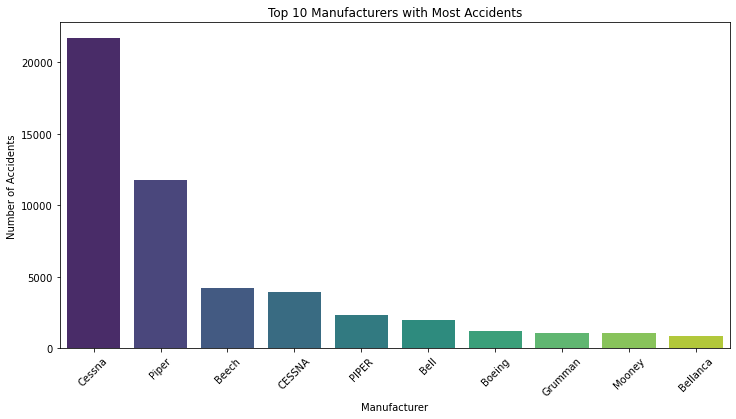

In [128]:
# visualization of the top 10 manufacturers with the most accidents
plt.figure(figsize=(12,6))
sns.barplot(x=make_count.index, y=make_count.values, palette='viridis')
plt.title('Top 10 Manufacturers with Most Accidents')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

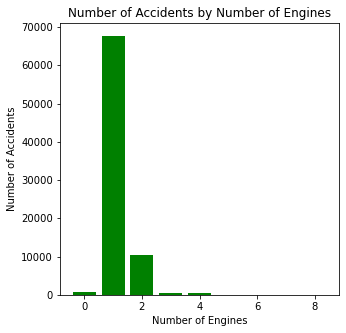

In [129]:
# Visualising the relationship between the number of engines and accidents
plt.figure(figsize=(5,5))
plt.bar(engine_number_counts.index, engine_number_counts.values, color='Green')
plt.title('Number of Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.show()

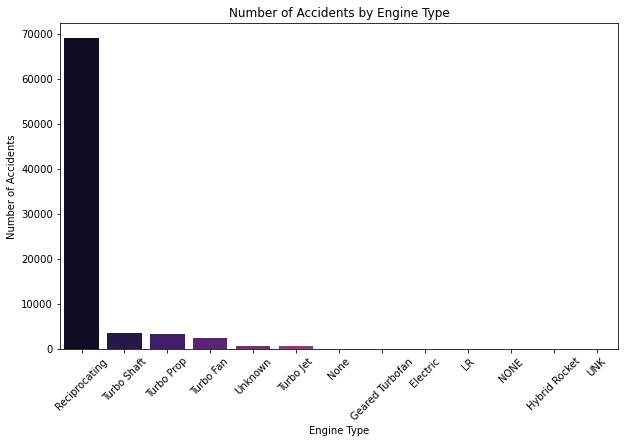

In [130]:
# Visualisation of the number of accidents based on engine type
plt.figure(figsize=(10,6))
sns.barplot(x=engine_type_counts.index, y=engine_type_counts.values, palette='magma')
plt.title('Number of Accidents by Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

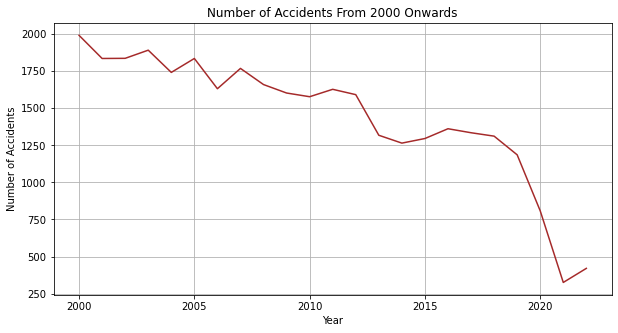

In [131]:
#converting the 'Event.Date' column to datetime format and extracting the year

df['Year'] = pd.to_datetime(df['Event.Date']).dt.year

#filter data from 2000 onwards
df = df[df['Year'] >= 2000]

#counting the number of accidents per year
accidents_per_year = df['Year'].value_counts().sort_index()

# Visualisation of the number of accidents as the year progresses
plt.figure(figsize=(10,5))
plt.plot(accidents_per_year.index, accidents_per_year.values, linestyle ='-', color = 'brown')
plt.title('Number of Accidents From 2000 Onwards')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.show()  

This graph shows that the frequency of aircraft accidents has gradually decreased from 2000 to 2022. This indicates that aviation safety standards and technologies are improving over time which reduces overall busssiness risk for entering the industry today.